# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [3]:
import cufflinks as cf

In [4]:
cf.go_offline()

In [5]:
?pd.DataFrame.iplot

In [6]:
data.groupby('ItemType', as_index=False).agg({'RetailSales':'sum', 'RetailTransfers':'sum', 'WarehouseSales':'sum'})

,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,BEER,209763.11,234924.44,2437617.32
1,DUNNAGE,0.00,0.00,-45331.00
2,KEGS,0.00,0.00,43558.00
3,LIQUOR,309847.85,334176.41,33173.32
4,NON-ALCOHOL,8109.97,9058.37,8656.72
5,REF,281.34,171.92,-6754.00
6,STR_SUPPLIES,995.98,3594.70,0.00
7,WINE,313400.42,340710.51,433009.47


In [7]:
chart_barv=data.groupby('ItemType', as_index=False).agg({'RetailSales':'sum', 'RetailTransfers':'sum', 'WarehouseSales':'sum'})

In [8]:
chart_barv.iplot(kind='bar',
                x='ItemType',
                title='Amount of retail sales, retail transfers and warehouse sales by item type',
                dimensions=(850, 1000))

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [9]:
supplier = data.groupby('Supplier', as_index=False).agg({'RetailSales':'sum', 'RetailTransfers':'sum', 'WarehouseSales':'sum'})

In [10]:
supplier.head(10)

,Supplier,RetailSales,RetailTransfers,WarehouseSales
0,8 VINI INC,2.78,2.00,1.00
1,A HARDY USA LTD,0.40,0.00,0.00
2,A I G WINE & SPIRITS,12.52,5.92,134.00
3,A VINTNERS SELECTIONS,8640.57,8361.10,29776.67
4,A&E INC,11.52,2.00,0.00
5,A&W BORDERS LLC,0.80,1.00,0.00
6,ADAMBA IMPORTS INTL,32.20,40.49,0.00
7,AIKO IMPORTERS INC,11.24,11.00,3.00
8,ALLAGASH BREWING COMPANY,304.09,339.00,1742.92
9,ALLIED IMPORTERS USA LTD,7.63,11.00,18.00


In [11]:
supplier['Total']=supplier.sum(axis=1)

In [12]:
supplier.head(10)

,Supplier,RetailSales,RetailTransfers,WarehouseSales,Total
0,8 VINI INC,2.78,2.00,1.00,5.78
1,A HARDY USA LTD,0.40,0.00,0.00,0.40
2,A I G WINE & SPIRITS,12.52,5.92,134.00,152.44
3,A VINTNERS SELECTIONS,8640.57,8361.10,29776.67,46778.34
4,A&E INC,11.52,2.00,0.00,13.52
5,A&W BORDERS LLC,0.80,1.00,0.00,1.80
6,ADAMBA IMPORTS INTL,32.20,40.49,0.00,72.69
7,AIKO IMPORTERS INC,11.24,11.00,3.00,25.24
8,ALLAGASH BREWING COMPANY,304.09,339.00,1742.92,2386.01
9,ALLIED IMPORTERS USA LTD,7.63,11.00,18.00,36.63


In [13]:
sort_supplier = supplier.sort_values('Total', ascending=True)
sort_supplier

,Supplier,RetailSales,RetailTransfers,WarehouseSales,Total
308,VINTAGE VIRGINIA APPLES,0.16,-0.50,0.00,-0.34
328,WINEBOW INC,1.24,-1.58,0.00,-0.34
206,PACIFIC RIM WINEMAKERS,0.00,0.00,0.00,0.00
118,FREELANCE WINES LLC,0.00,0.00,0.00,0.00
106,FIORE WINERY,0.16,0.00,0.00,0.16
...,...,...,...,...,...
94,E & J GALLO WINERY,67455.63,75129.83,75594.99,218180.45
139,HEINEKEN USA,20923.17,23004.25,318812.59,362740.01
15,ANHEUSER BUSCH INC,42559.14,47322.64,493856.19,583737.97
69,CROWN IMPORTS,26707.83,29561.67,579824.70,636094.20


In [14]:
chart_barh = sort_supplier.tail(10)

In [15]:
chart_barh.iplot(kind='barh',
                x='Supplier',
                title='Top10 of suppliers according to their total sales')

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [16]:
data.groupby(['Month','Year'], as_index=False).agg({'RetailSales':'mean', 'RetailTransfers':'mean', 'WarehouseSales':'mean'})

,Month,Year,RetailSales,RetailTransfers,WarehouseSales
0,1,2018,5.679413,5.574833,19.072137
1,2,2018,5.939247,6.050136,20.229658
2,4,2017,0.000000,15.707503,0.000000
3,5,2017,7.038838,7.421817,27.310548
4,6,2017,7.143914,6.950396,27.839069
5,8,2017,6.409991,6.584726,28.122641
6,9,2017,6.757254,6.419721,22.817909
7,10,2017,6.549021,6.827827,22.289367
8,11,2017,6.765496,7.103699,23.348862
9,12,2017,9.078241,8.353759,21.169463


In [17]:
multichart=data.groupby(['Year','Month'], as_index=False).agg({'RetailSales':'mean', 'RetailTransfers':'mean', 'WarehouseSales':'mean'})

In [18]:
multichart.iplot(kind='line',
                      x=['Month','Year'],
                      xTitle='Month & year',
                      yTitle='Average sales',
                      title='Average sales according to the month & year')

## 4. Plot the same information as above but as a bar chart.

In [19]:
multichart.iplot(kind='bar',
                      x=['Month','Year'],
                      xTitle='Month & year',
                      yTitle='Average sales',
                      title='Average sales according to the month & year')

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [20]:
data.groupby(['ItemType','Month','Year'], as_index=False).agg({'RetailSales':'sum'}) 
#I cannot build a multi-line chart on this way.

,ItemType,Month,Year,RetailSales
0,BEER,1,2018,16606.33
1,BEER,2,2018,18640.31
2,BEER,4,2017,0.00
3,BEER,5,2017,25023.24
4,BEER,6,2017,27863.26
...,...,...,...,...
68,WINE,8,2017,30707.45
69,WINE,9,2017,32936.89
70,WINE,10,2017,33108.76
71,WINE,11,2017,38275.92


In [21]:
#In that case, I use matplotlib to build the chart
data.pivot_table(values='RetailSales',
                 columns='ItemType',
                 index=['Year','Month'], 
                 aggfunc='sum')

ItemType        BEER  DUNNAGE  KEGS    LIQUOR  NON-ALCOHOL    REF  \
Year Month                                                          
2017 4          0.00      NaN   NaN      0.00         0.00   0.00   
     5      25023.24      NaN   NaN  35123.36          NaN    NaN   
     6      27863.26      0.0   0.0  35035.31      1209.23  30.60   
     8      23030.13      0.0   0.0  32186.04      1091.28  19.54   
     9      23852.76      0.0   0.0  32532.32       997.11  38.88   
     10     22583.78      0.0   0.0  32491.59       945.63  22.82   
     11     23341.14      0.0   0.0  35524.77      1005.19  63.11   
     12     28822.16      0.0   0.0  49522.28      1316.44  41.21   
2018 1      16606.33      0.0   0.0  28579.87       732.25  23.66   
     2      18640.31      0.0   0.0  28852.31       812.84  41.52   

ItemType    STR_SUPPLIES      WINE  
Year Month                          
2017 4              0.00      0.00  
     5               NaN  34546.89  
     6             89.22  33129.64  
     8             77.34  30707.45  
     9             94.64  32936.89  
     10            84.38  33108.76  
     11           106.06  38275.92  
     12           439.64  51492.76  
2018 1             56.94  29792.72  
     2             47.76  29409.39

In [22]:
lines_per_item = data.pivot_table(values='RetailSales',
                 columns='ItemType',
                 index=['Year','Month'], 
                 aggfunc='sum')

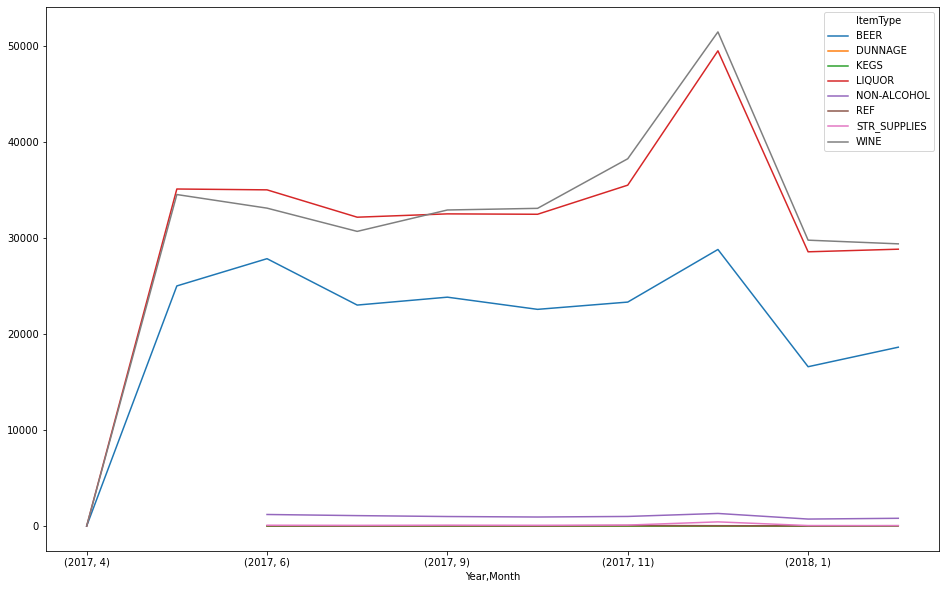

In [23]:
lines_per_item.plot.line(figsize=(16,10))

## 6. Plot the same information as above but as a bar chart.

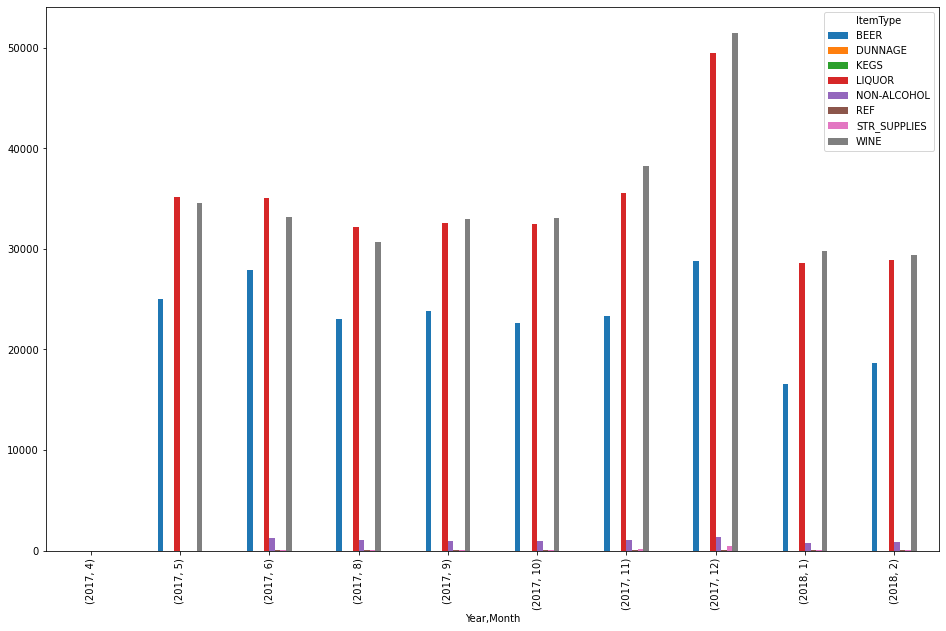

In [24]:
lines_per_item.plot.bar(figsize=(16,10))

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

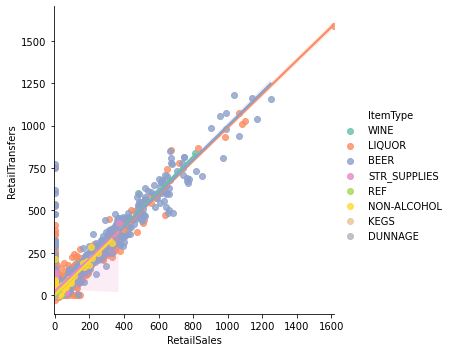

In [39]:
chart_scatterplot = sns.lmplot(data=data,
                              x='RetailSales',
                              y='RetailTransfers',
                              hue='ItemType',
                              palette='Set2')

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

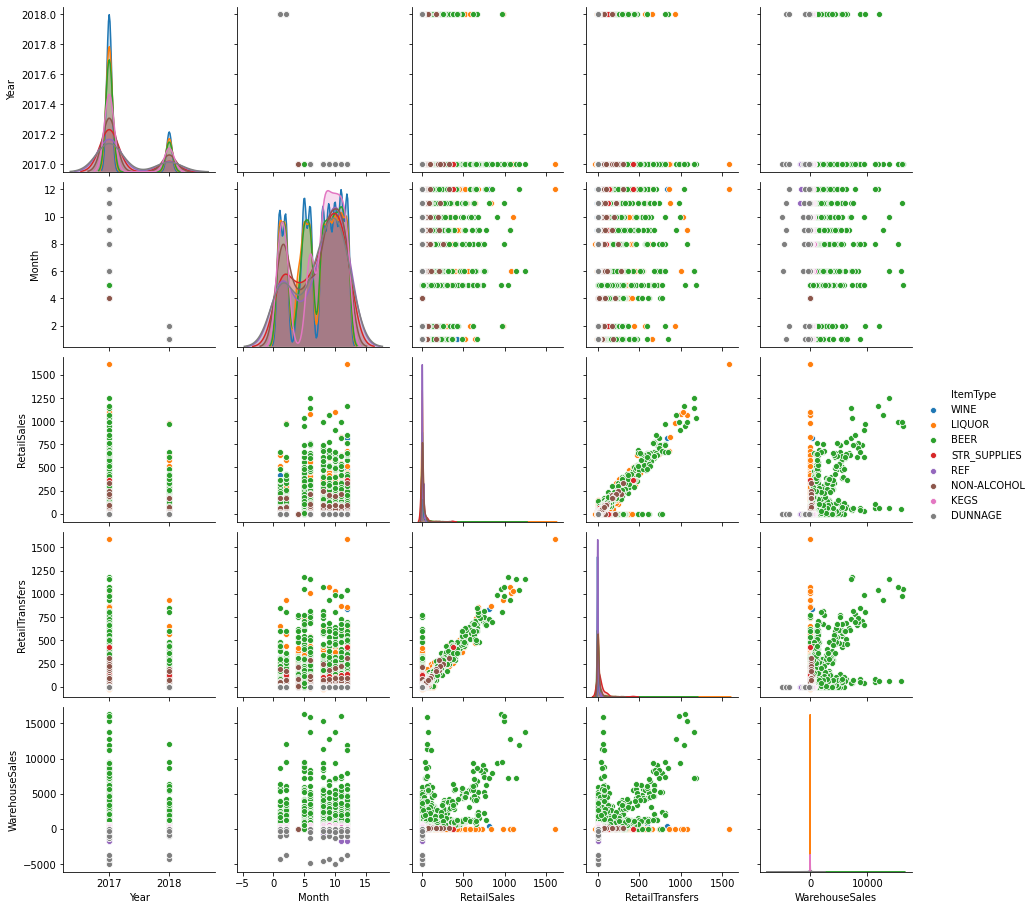

In [43]:
chart_scatter_matrix = sns.pairplot(data=data,
                                   hue='ItemType',
                                   diag_kind='kde')